In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [24]:
!pip install findspark

In [25]:
!pip install pyspark


In [26]:
!pip install py4j

In [2]:
import pyspark
from pyspark import SparkContext

In [3]:
import findspark
findspark.init("/opt/spark")

# Configurasyon ve Spark Bağlantısı 

In [4]:
from pyspark import SparkContext
sc = SparkContext(master = "local")
sc #aşağıda Spark UI'a tıkladığımızda yapılan uygulamalardaki gözlemleri yapabileceğimiz bir sekme açılıyor

<SparkContext master=local appName=pyspark-shell>

In [5]:
sc.version

'3.1.1'

In [6]:
sc.sparkUser()

'eren'

In [7]:
sc.appName

'pyspark-shell'

In [8]:
dir(sc) #yapılabilecekler

['PACKAGE_EXTENSIONS',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accumulatorServer',
 '_active_spark_context',
 '_assert_on_driver',
 '_batchSize',
 '_callsite',
 '_checkpointFile',
 '_conf',
 '_dictToJavaMap',
 '_do_init',
 '_encryption_enabled',
 '_ensure_initialized',
 '_gateway',
 '_getJavaStorageLevel',
 '_initialize_context',
 '_javaAccumulator',
 '_jsc',
 '_jvm',
 '_lock',
 '_next_accum_id',
 '_pickled_broadcast_vars',
 '_python_includes',
 '_repr_html_',
 '_serialize_to_jvm',
 '_temp_dir',
 '_unbatched_serializer',
 'accumulator',
 'addFile',
 'addPyFile',
 'appName',
 'applicationId',
 'binaryFiles',
 'bina

In [9]:
sc.stop() #çalışmadığımız zamanlarda uygulamayı kapattık

In [11]:
#gelişmiş ayarlar yaparak uygulamayı başlatalım
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf #konfigürasyon ayları için
from pyspark import SparkContext

#özellikleri kendimiz belirliyoruz
spark = SparkSession.builder \
    .master("local") \
    .appName("pyspark_uygulama") \
    .config("spark.executer.memory", "4gb") \
    .getOrCreate()

#master local seçtik
#uygulama adını ayarlıyoruz
#bu kısmı boş bırakırsak optimum düzeyde çalışır. Normalde ne kadarlık değer vermek istiyorsak o kadarla çalışır  orijinal kodda bu yazıyodu(config("spark.executer.memory", "16gb"))

sc = spark.sparkContext 
sc
#yukardaki uygulamaları kullanarak yeni bir spark çalıştır dedik

<SparkContext master=local appName=pyspark_uygulama>

# Temel DataFrame İşlemleri

In [12]:
spark_df = spark.read.csv("diabetes.csv", header = True, inferSchema = True) #spark dataframe'i oluşturuyoruz

In [13]:
spark_df.printSchema() #değişken tipleri vs şemasına ulaştık

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [14]:
type(spark_df) #spark dataframe'i

pyspark.sql.dataframe.DataFrame

In [15]:
spark_df.cache() #rami cache'lemek için(rame taşımak gibi düşünebilirz)

DataFrame[Pregnancies: int, Glucose: int, BloodPressure: int, SkinThickness: int, Insulin: int, BMI: double, DiabetesPedigreeFunction: double, Age: int, Outcome: int]

In [16]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [17]:
import seaborn as sns #pyhton dataframei bildiğimiz
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64","int64"]) #sürekli değişkenleri seçtik

In [18]:
type(df) #pandas dataframe'i

pandas.core.frame.DataFrame

In [19]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [20]:
spark_df.head() #spark kendince head fonksiyonu çıktısı üretti

Row(Pregnancies=6, Glucose=148, BloodPressure=72, SkinThickness=35, Insulin=0, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=50, Outcome=1)

In [21]:
df.dtypes

carat    float64
depth    float64
table    float64
price      int64
x        float64
y        float64
z        float64
dtype: object

In [22]:
spark_df.dtypes #görüntü farklı ancak içerik aynı type görme

[('Pregnancies', 'int'),
 ('Glucose', 'int'),
 ('BloodPressure', 'int'),
 ('SkinThickness', 'int'),
 ('Insulin', 'int'),
 ('BMI', 'double'),
 ('DiabetesPedigreeFunction', 'double'),
 ('Age', 'int'),
 ('Outcome', 'int')]

In [23]:
df.ndim

2

In [24]:
spark_df.size #sparkta size fonku yok dataframe'deki ile aynı olarak

AttributeError: 'DataFrame' object has no attribute 'size'

----------------------------
----------------------------
## Pandas dataframe'i paralel olarak çalışma özelliğine sahip değildir. Spark farklı nodlarda cluster içerisinde paralel çalışlabilir.
## Spark data frame "lazy" tembel mantıkla çalışır pandas böyle değildir.
## Spark immutable(değiştirilemezdir) ancak Pandas değiştirilebilirdir. Spark değiştirilemez ancak  dönüştürülebilir.
## Pandas'ın veri manüpülasyon işlemleri çok daha zengindir Spark daha kısıtlıdır.
---------------------------
----------------------------


In [25]:
spark_df.show(2) #gözlem sayısını kaç girersek onu gösterir

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 2 rows



In [26]:
spark_df.count() #gözlemleri saydık

768

In [27]:
len(spark_df.columns) #kaç değişken olduğunu gördük

9

In [28]:
spark_df.describe().show() #özet istatistikleri çağırdık

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.95

In [29]:
#degisken secme(tek bir değişken için çağırdık)

In [30]:
spark_df.describe("Glucose").show()

+-------+-----------------+
|summary|          Glucose|
+-------+-----------------+
|  count|              768|
|   mean|     120.89453125|
| stddev|31.97261819513622|
|    min|                0|
|    max|              199|
+-------+-----------------+



In [47]:
spark_df.describe("Glucose") #showu sildiğimizde sadece yapıyı gösteriyo lazy özelliklerinden birisi

DataFrame[summary: string, Glucose: string]

In [31]:
spark_df.select("Glucose","Pregnancies").show(5) #2 değişken seçme özelliklerini seçme işlemi. Normalde köşeli parantez içine yazıyorduk burda öyle bir durum yok

+-------+-----------+
|Glucose|Pregnancies|
+-------+-----------+
|    148|          6|
|     85|          1|
|    183|          8|
|     89|          1|
|    137|          0|
+-------+-----------+
only showing top 5 rows



In [32]:
spark_df.select("Glucose").distinct().count() #bir değişken üzerinde eşsiz değer sayısına ulaşmak için

136

In [49]:
spark_df.select("Glucose").dropDuplicates().show() #kendini tekrarlayan değerleri gördük.

+-------+
|Glucose|
+-------+
|    148|
|     85|
|    137|
|     65|
|    133|
|     78|
|    155|
|    108|
|    193|
|    115|
|    126|
|    101|
|     81|
|    183|
|     76|
|    159|
|     44|
|    103|
|     91|
|    128|
+-------+
only showing top 20 rows



In [50]:
spark_df.select("Glucose").dropDuplicates().count() #bir değişken üzerinde kendini tekrarlayan değerleri silmek için.Eşsiz değerleri bıraktık yani

136

In [34]:
spark_df.crosstab("Outcome","Pregnancies").show() #iki değişken arasında crosstab oluşturma işlemi.

+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|Outcome_Pregnancies|  0|  1| 10| 11| 12| 13| 14| 15| 17|  2|  3|  4|  5|  6|  7|  8|  9|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|                  1| 38| 29| 10|  7|  4|  5|  2|  1|  1| 19| 27| 23| 21| 16| 25| 22| 18|
|                  0| 73|106| 14|  4|  5|  5|  0|  0|  0| 84| 48| 45| 36| 34| 20| 16| 10|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+



In [51]:
spark_df.dropna().count() #eksik gözlemleri bırakmak için sonrasında da spark dataframe'i saydık . baştakiyle aynı değer çıktı eksik gözlem yok yani

768

In [35]:
spark_df.dropna().show(3) 

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 3 rows



In [36]:
#gozlem secme

In [52]:
spark_df.filter(spark_df.Age >40).count() #yaşı 40tan büyük olanları gözlemlemek ve saymak için

194

In [53]:
spark_df.groupby("Outcome").count().show() #gruplama işlemleri. Outcome değişkenine göre gruplayıp sınıflarına ayırdı

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



In [39]:
spark_df.groupby("Outcome").agg({"BMI": "mean"}).show() #outcome'a göre gruplayıp bu grupların ortalamasını aldık

+-------+-----------------+
|Outcome|         avg(BMI)|
+-------+-----------------+
|      1|35.14253731343278|
|      0|30.30419999999996|
+-------+-----------------+



In [40]:
spark_df.withColumn("yeni_degisken", spark_df.BMI / 2).select("BMI","yeni_degisken").show(5) #değişken ekleme ve silme işlemi yaptık. BMI değişkenini böldük

+----+-------------+
| BMI|yeni_degisken|
+----+-------------+
|33.6|         16.8|
|26.6|         13.3|
|23.3|        11.65|
|28.1|        14.05|
|43.1|        21.55|
+----+-------------+
only showing top 5 rows



In [41]:
spark_df.withColumnRenamed("Outcome","bagimli_degisken").columns #sütunların adını değiştirdik

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'bagimli_degisken']

In [42]:
spark_df.show(3) #spark df'i gözlemledik. orjinal durum okrunuyor

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 3 rows



In [43]:
spark_df.drop("Insulin").columns #insulin dğeişkenini sildik ve sütunları ayzdırdık

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [44]:
a = spark_df.groupby("Outcome").count().toPandas() #sparktan pandasa lokal pandasa çekmek istediğimizde toPandas() kullanıyoruz. Spark dataframe'inden pandasdataframe'ine döndürdük.

In [45]:
a

,Outcome,count
0,1,268
1,0,500


In [46]:
a.iloc[1,1] 

500

# yukarda spark dataframe'inde bu işlemi eleman seçmesini yapamıyorduk. Ancak pandasa çevirdikten sonra yapabilir hale geldik. Bu aradaki farkın olmaması pandas bizim hardware'imizde bulunuyordu ancak spark dataframe bizim bilgisayarımızda local olarak bulunmayan işlemleri yapıyordu. Biz bunu sanal ortamdan local ortama çekerek toPandas() ile veri manipülasyon işlemlerimizi eski özgürlüğüne geri döndürdük.

# SQL İşlemleri

In [54]:
sc

<SparkContext master=local appName=pyspark_uygulama>

### Alışık olduğmuz sql tarzında spark dataframe'i üzerinde işlemler yapacağız

In [55]:
spark_df.registerTempTable("table_df")

In [56]:
spark.sql("show databases").show() #default isimli veri tabanını gördük

+---------+
|namespace|
+---------+
|  default|
+---------+



In [57]:
spark.sql("show tables").show() #veri tabınını değil de tablaları görmek için

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
|        | table_df|       true|
+--------+---------+-----------+



In [58]:
spark.sql("select Glucose from table_df").show(5) #Atak istenen sorgu işlemini yazıyoruz ve görselleştiriyoruz

+-------+
|Glucose|
+-------+
|    148|
|     85|
|    183|
|     89|
|    137|
+-------+
only showing top 5 rows



In [59]:
spark.sql("select Outcome, mean(Glucose) from table_df group by Outcome").show(5) #outcome gelsin gruplarına göre ortalamalarını aldıktan sonra

+-------+------------------+
|Outcome|     mean(Glucose)|
+-------+------------------+
|      1|141.25746268656715|
|      0|            109.98|
+-------+------------------+



# Büyük Veri Görselleştirme

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
sns.barplot(x = "Outcome", y = spark_df.Outcome.index, data = spark_df)

AttributeError: 'DataFrame' object has no attribute 'get'

### Yukarda işlemi gerçekletşremedik çünkü spark böyle bir özelliğe sahip değil. Bizim yapmamız gereken şey ise spark tarafında veriyi aggrige etmek toplulaştırmak istenilen dğeişken sayısına düşürdükten sonrasında pandasa aktarıp görselleştirmek. Yukarda aggrigation işlemlerini yüklü kısmı sparka yaptırdık. Sonrasında pandasa atarak sadece görselleştirme işini pandasa yaptırmış olduk.

In [62]:
sdf = spark_df.toPandas()
sdf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:xlabel='Outcome'>

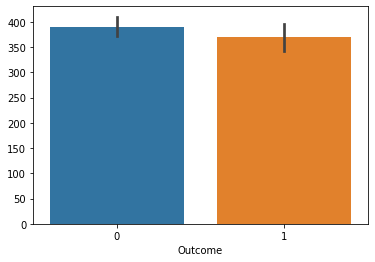

In [63]:
sns.barplot(x = "Outcome", y = sdf.Outcome.index, data = sdf)

# Uçtan Büyük Veride Makine Öğrenmesi

## Spark Session ve Veri Seti

In [64]:
sc.stop()

In [65]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

spark = SparkSession.builder \
    .master("local") \
    .appName("churn_modellemesi") \
    .config("spark.executer.memory", "16gb") \
    .getOrCreate()



sc = spark.sparkContext
sc

<SparkContext master=local appName=churn_modellemesi>

In [66]:
spark_df = spark.read.csv("churn.csv", 
                          header = True, 
                          inferSchema = True,
                          sep = ",")
spark_df.cache() #localden sparka taşıyım cahce'ledik

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [67]:
spark_df.printSchema() #değişkenlere bakalım

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [68]:
spark_df.show(5) #ilk 5 değişkeni gözlemledik

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [70]:
spark_df = spark_df.toDF(*[c.lower() for c in spark_df.columns]) #değişkenlerin hepsini küçük harfe çevirdik. Büyük harf için c.upper()

In [71]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           names| age|total_purchase|account_manager|years|num_sites|churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [72]:
#df.columns = map(str.lower, df.columns) #pandas dataframe için de bu şekilde küçültebiliriz

In [73]:
spark_df = spark_df.withColumnRenamed("_c0", "index") #_c0 değişkenini index olarak isimlendirdik

In [74]:
spark_df.show(2)

+-----+----------------+----+--------------+---------------+-----+---------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 2 rows



In [75]:
spark_df.count() #gözlem sayısına baktık

900

In [76]:
len(spark_df.columns) #değişken sayısına baktık

8

In [77]:
spark_df.columns #değişkenlerin isimlerine baktık

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn']

In [78]:
spark_df.distinct().count() #gözlemlerin eşsiz olup olmadığına bakıyoruz

900

In [79]:
spark_df.select("names").distinct().count() # veri setindeki isimlerden tekrar eden var mı diye baktık 1 tane varmış

899

In [80]:
spark_df.groupby("names").count().sort("count", ascending = False).show(3) # kendini tekrarlayan değerleri yazdır sıraya göre sırala tekrarlayanları en üstte görmek için

+----------------+-----+
|           names|count|
+----------------+-----+
|   Jennifer Wood|    2|
|     John Barber|    1|
|Patrick Robinson|    1|
+----------------+-----+
only showing top 3 rows



In [81]:
spark_df.filter(spark_df.names == "Jennifer Wood").show() # isim benzerliği mi yoksa yanlış veri mi aynen kendini tekrarlıyo mu bakıyoruz. İsim benzerliği varmış..

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|   22|Jennifer Wood|35.0|       9381.12|              1| 6.78|     11.0|    1|
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



In [82]:
spark_df.select("names").dropDuplicates().groupBy("names").count().sort("count",ascending = False).show(3)

+----------------+-----+
|           names|count|
+----------------+-----+
|    Patrick Bell|    1|
|Patrick Robinson|    1|
|   Chelsea Marsh|    1|
+----------------+-----+
only showing top 3 rows



In [83]:
spark_df.where(spark_df.index == 439).select("names").show() #indexini girerek gözleme erişmek. sadece ismine erişmek istedik

+-------------+
|        names|
+-------------+
|Jennifer Wood|
+-------------+



In [141]:
spark_df.where(spark_df.index == 439).show() #bu da bütün bilgilerine erişmek için

+-----+-------------+----+--------------+---------------+-----+---------+-----+--------+-----+
|index|        names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|label|
+-----+-------------+----+--------------+---------------+-----+---------+-----+--------+-----+
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|  2304.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+--------+-----+



## Spark çıktısını kullanılabilecek olan str formatında elde ettik. Jennifer wood adını str olarak aldık. toPandas() gibi collect() ile bunu locale alıp işlemler gerçekleştirdik.

In [84]:
jen = spark_df.where(spark_df.index == 439).collect()[0]["names"] 

In [142]:
jen

'Jennifer Wood'

In [85]:
type(jen)

str

In [86]:
dir(jen)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',


In [87]:
jen.upper()

'JENNIFER WOOD'

## Real life problem için spark session açtık  veri seti aldık ilk düzenlemeleri gerçekleştirdik. Değişken dönüşümleri eşsiz değer sayısını unique durumunu belirli bi işlem bazında incelenmesini, indexe erişmek gibi işlemleri tamamladık.

## Keşifçi Veri Analizi

In [88]:
print(spark_df.describe().show())

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|             index|        names|              age|   total_purchase|   account_manager|            years|         num_sites|              churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [89]:
spark_df.select("age","total_purchase", "account_manager", "years","num_sites","churn").describe().toPandas().transpose()
#names ve index hariç bütün değişkenleri seçtik.describe fonksiyonundan sonra pandasa aktarıp transpozunu aldık. Pandas dataframe'e çevirdik

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,900,41.81666666666667,6.127560416916251,22.0,65.0
total_purchase,900,10062.82403333334,2408.644531858096,100.0,18026.01
account_manager,900,0.4811111111111111,0.4999208935073339,0,1
years,900,5.27315555555555,1.274449013194616,1.0,9.15
num_sites,900,8.587777777777777,1.7648355920350969,3.0,14.0
churn,900,0.16666666666666666,0.3728852122772358,0,1


In [90]:
spark_df.filter(spark_df.age > 47).count() #standart sapmasıyla ortalamayı toplayıp bunun dışında kalan değerler kaç tane bakıyoruz

161

In [91]:
spark_df.groupby("churn").count().show() #churne göre gruplayıp sınıflarına ayırdık(bağımlı değişken)

+-----+-----+
|churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [92]:
spark_df.groupby("churn").agg({"total_purchase": "mean"}).show() #chrun'a(bağımlı değişkene) göre grupladıktan sonra toplam satın almanın ortalamsına bakıyoruz
#burdaki sınıf farklarına bakınca churn olma durmunun toplam satın alma ile arasında bir alaka yok etkilemiyor gibi

+-----+-------------------+
|churn|avg(total_purchase)|
+-----+-------------------+
|    1| 10192.179933333337|
|    0| 10036.952853333332|
+-----+-------------------+



In [93]:
spark_df.groupby("churn").agg({"years": "mean"}).show() # yıl değerinin de ortalamsına churn ile ortalamasına bakıyoruzbakıyoruz 

+-----+------------------+
|churn|        avg(years)|
+-----+------------------+
|    1|5.8835999999999995|
|    0|5.1510666666666625|
+-----+------------------+



In [94]:
kor_data = spark_df.drop("index","names").toPandas() #korelasyon matrisi oluştrumak için inces ve name değişkenlerini bırakarak pandasa atıyoruz
#accounr manager 0-1 değerlerinden oluştuğu için grafikleri çok bişey ifade etmeyecektir
#age ve numm_sites arasındaki grafiğe bakınca kategorik değişken oolabilir. Grafik satır satır sıralı düzgün çıkmış.sürekli gibi görünen ancak kesikli sayısal değişken.
#year ile age arasına baktık toz bulutu var çok anlamlı görünmüyor.

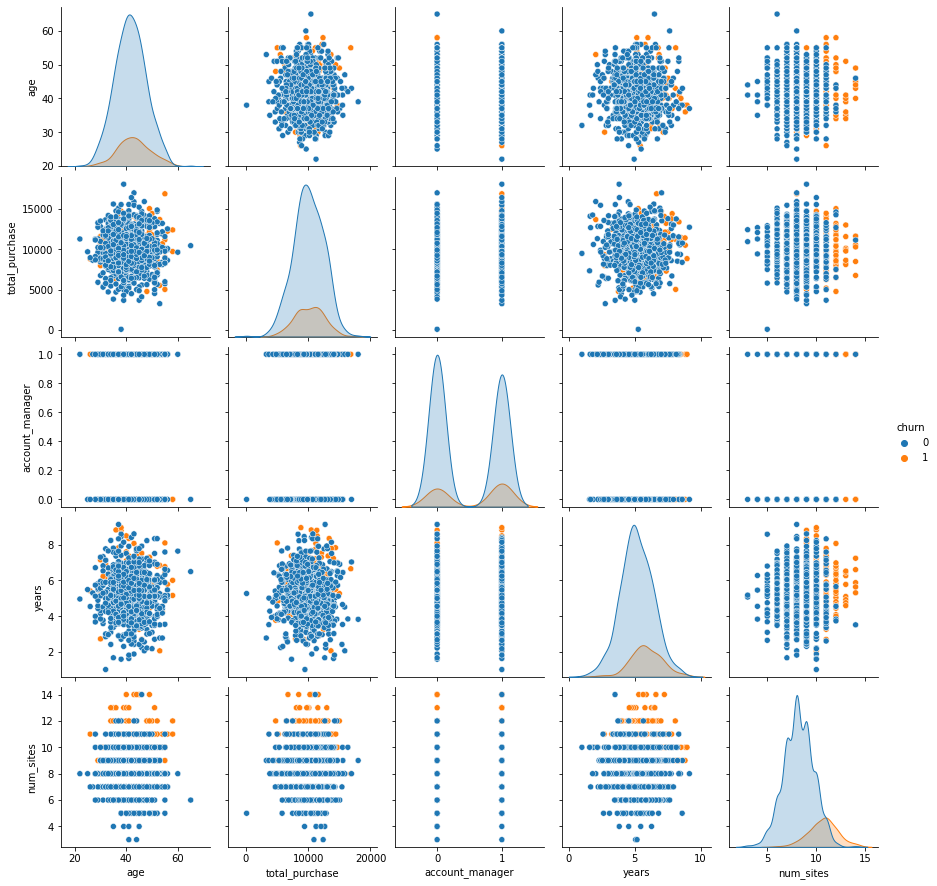

In [95]:
import seaborn as sns
sns.pairplot(kor_data, hue = "churn");

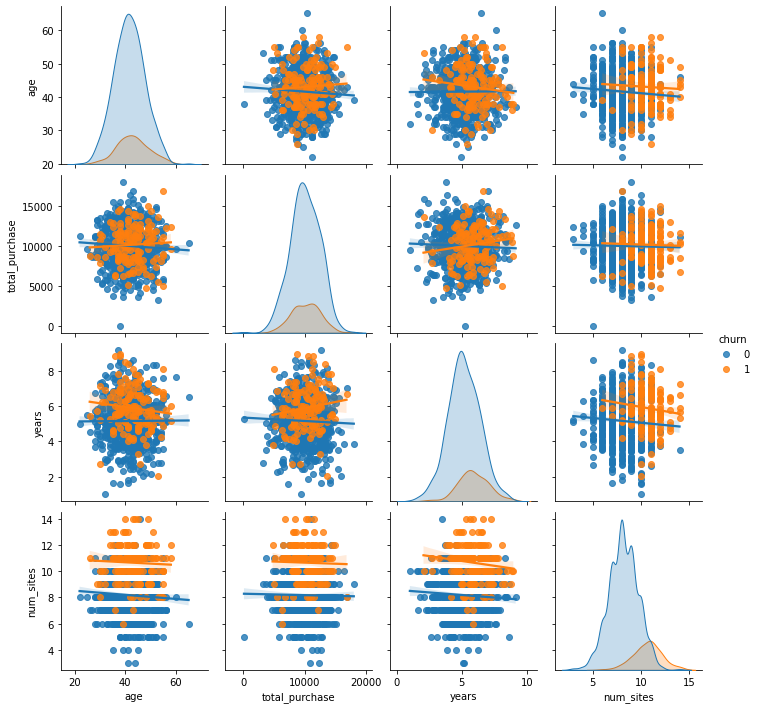

In [96]:
sns.pairplot(kor_data, vars = ["age", "total_purchase","years","num_sites"], #girmek istediğimiz değişkenleri giriyoruz(anlamlı olduğunu düşündüğümüz)
             hue = "churn",
            kind = "reg"); #regresyon eğrisi ekledik reg ile

#yukarda churn'u ekstra bir boyu oarak ekledik renklerden ayrımını yaptık ancak bunu net olarak incelemek için bu şekilde inceliyoruz

## Veri Ön İşleme

In [97]:
spark_df = spark_df.dropna() #eksik gözlemlerden kurtulduk

In [98]:
spark_df = spark_df.withColumn("age_kare", spark_df.age**2) #yeni bir gözlem birimi ekledik yaşların karesi olarak(feature engineering)

In [99]:
spark_df.show(3)

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
only showing top 3 rows



# Bağımlı ve bağımsız değişkenleri ayarlamamız gerekiyor çünkü büyük veri alanındaki fonksiyonların formatları uymaya biliyor. spark ve  scala yerine python R gibi dilleri kullanıyorsak bu ayarlamaları yapmamız gerekiyor.

In [100]:
from pyspark.ml.feature import StringIndexer #bağımlı değişkenimiz string değil ama öyleymiş gibi davranacağız

stringIndexer = StringIndexer(inputCol = "churn", outputCol = "label") #bağımlı değişkenlere label bağımsızlara feature isimlendirmesi yapıyoruz genelde
#churn ifadesini yakalyıp label'a dönüştürüoyruz. Burda churn zaten 0-1 değerlerini alıyor kategorikmiş gibi ancak normalde böyle olmayabilir.

####  Bir etiket dizini sütununu etiket dizinlerinin ML sütunuyla eşleyen bir etiket dizinleyici. Girdi sütunu sayısal ise, onu dizeye çeviririz ve dize değerlerini dizine ekleriz. Endeksler (0, numLabels) içindedir. Varsayılan olarak bu, etiket frekanslarına göre sıralanır böylece en sık kullanılan etiket 0 dizinini alır. Yani kredi ödeyememe durumu 1 değil olumsuz bir özellik olduğu için 0 olarak genelde ifade edilir.

In [101]:
?stringIndexer

Type:           StringIndexer
String form:    StringIndexer_dc840c54afab
File:           ~/anaconda3/lib/python3.7/site-packages/pyspark/ml/feature.py
Docstring:     
A label indexer that maps a string column of labels to an ML column of label indices.
If the input column is numeric, we cast it to string and index the string values.
The indices are in [0, numLabels). By default, this is ordered by label frequencies
so the most frequent label gets index 0. The ordering behavior is controlled by
setting :py:attr:`stringOrderType`. Its default value is 'frequencyDesc'.

.. versionadded:: 1.4.0

Examples
--------
>>> stringIndexer = StringIndexer(inputCol="label", outputCol="indexed",
...     stringOrderType="frequencyDesc")
>>> stringIndexer.setHandleInvalid("error")
StringIndexer...
>>> model = stringIndexer.fit(stringIndDf)
>>> model.setHandleInvalid("error")
StringIndexerModel...
>>> td = model.transform(stringIndDf)
>>> sorted(set([(i[0], i[1]) for i in td.select(td.id, td.indexed).co

In [102]:
indexed = stringIndexer.fit(spark_df).transform(spark_df) #fit etme işlemini gerçekleştiriyoruz

In [103]:
indexed.dtypes #churn int formatında label double formatında. label ı inte çeviricez

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_kare', 'double'),
 ('label', 'double')]

In [104]:
spark_df = indexed.withColumn("label", indexed["label"].cast("integer"))

In [105]:
spark_df.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_kare', 'double'),
 ('label', 'int')]

In [106]:
#bagimsiz degiskenlerin ayarlanmasi

In [107]:
from pyspark.ml.feature import VectorAssembler

In [108]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn',
 'age_kare',
 'label']

In [109]:
bag = ["age","total_purchase", "account_manager","years","num_sites"] #bağımsız değişkenlerin kullanacağımız olanlarını alıyoruz

In [110]:
vectorAssembler = VectorAssembler(inputCols = bag, outputCol = "features") #bağımsız değişkenlerden bir vektör oluşturduk. Bunu bir nesne oluşturarak yapıyoruz. Çıktısı features olacak

In [111]:
va_df = vectorAssembler.transform(spark_df) #nesnemizi girdik transform ediyoruz dönüştürüyoruz

In [112]:
final_df = va_df.select(["features","label"]) #bağımlı ve baımsız değişkenleri bi araya getirip final df değerlerimizi oluşturuyoruz

In [113]:
final_df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,0.0...|    1|
|[41.0,11916.22,0....|    1|
|[38.0,12884.75,0....|    1|
|[42.0,8010.76,0.0...|    1|
|[37.0,9191.58,0.0...|    1|
|[48.0,10356.02,0....|    1|
|[44.0,11331.58,1....|    1|
|[32.0,9885.12,1.0...|    1|
|[43.0,14062.6,1.0...|    1|
|[40.0,8066.94,1.0...|    1|
|[30.0,11575.37,1....|    1|
|[45.0,8771.02,1.0...|    1|
|[45.0,8988.67,1.0...|    1|
|[40.0,8283.32,1.0...|    1|
|[41.0,6569.87,1.0...|    1|
|[38.0,10494.82,1....|    1|
|[45.0,8213.41,1.0...|    1|
|[43.0,11226.88,0....|    1|
|[53.0,5515.09,0.0...|    1|
|[46.0,8046.4,1.0,...|    1|
+--------------------+-----+
only showing top 20 rows



# Bu features ve labels işlemlerini yapmamızın nedeni Spark'ın makine öğrenmesi modelleri için bizden beklediği yapıya uydurmak zorunda olmamız. Elimize bi veri seti geldiğinde features ve labels formatına getirmemiz bize kolaylık sağlar.

## Test-train

In [114]:
splits = final_df.randomSplit([0.7,0.3]) #test train ayırıyoruz
train_df = splits[0] #0.7 aldık
test_df = splits[1] #0.3 aldık

In [115]:
train_df #bağımlılar int bağımsızlar vector olarak görünüyor

DataFrame[features: vector, label: int]

In [116]:
test_df

DataFrame[features: vector, label: int]

# GBM ile Müşteri Terk Modellemesi

In [117]:
from pyspark.ml.classification import GBTClassifier

In [118]:
gbm = GBTClassifier(maxIter = 10, featuresCol = "features", labelCol = "label") #model nesnemizi oluşturduk

In [119]:
gbm_model = gbm.fit(train_df)

In [120]:
y_pred = gbm_model.transform(test_df)

In [121]:
y_pred

DataFrame[features: vector, label: int, rawPrediction: vector, probability: vector, prediction: double]

In [122]:
ac = y_pred.select("label","prediction") # gerçek değerleri(label) tahmin edilen değerleri(double) alarak ac'ye kaydettik

In [123]:
ac.filter(ac.label == ac.prediction).count() / ac.count() #accuracy değerimizi oluşturduk. İlkel test hatamızı bulduk. Tune edicez

0.8588235294117647

In [124]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

evaluator = BinaryClassificationEvaluator() #nesnemizi oluşturduk

paramGrid = (ParamGridBuilder() #parametre gridimizi oluşturduk
             .addGrid(gbm.maxDepth, [2, 4, 6])
             .addGrid(gbm.maxBins, [20, 30])
             .addGrid(gbm.maxIter, [10, 20])
             .build())

cv = CrossValidator(estimator= gbm, estimatorParamMaps = paramGrid, evaluator=evaluator, numFolds= 10) #crossvalidation nesnemizi oluşturduk

In [125]:
cv_model = cv.fit(train_df) #train veriseti üzerinden fit ettik. arka tarafta scalaya dönüştürüp bu işlemi gerçekleştiriyor.

In [126]:
y_pred = cv_model.transform(test_df)
ac = y_pred.select("label","prediction") #seçme işlemlerini gerçekleştirdik

In [127]:
ac.filter(ac.label == ac.prediction).count() / ac.count() #filtreleme işlemini yapıyoruz. Gerçek değerler ile tahmin değerlerini karşılaştırıyoruz

0.8745098039215686

In [128]:
evaluator.evaluate(y_pred) #eğri altında kalan AUC işlemini gerçekleştiriyoruz

0.8755341880341881

# Buraya kadar yaptığım real life projesinde tek eksik verileri kendi localimizden almış olmamız. Gerçek bir projede yaparken ise bu verileri sql vs ile internetten çekeceğiz bu rakamları tahmin hatalarını hesaplamamız tek başına birşeye yaramıyor. Aşağıda bunu yararlı bir şekle çevirmek için yorum ve değerlendirme kısmını gerçekletireceğiz.
--------


## Bu müşteriler bizi terk eder mi?

In [129]:
#yeni müşteriler olarak kendimiz verileri girdik değğişkenleri oluşturduk
import pandas as pd
names = pd.Series(["Ali Ahmetoğlu", "Berkcan Tanerbey", "Harika Gündüz","Polat Alemdar", "Ata Bakmayan Ali"])
age = pd.Series([38, 43, 34, 50, 40])
total_purchase = pd.Series([30000, 10000, 6000, 30000, 100000])
account_manager = pd.Series([1,0,0,1,1])
years = pd.Series([20, 10, 3, 8, 30])
num_sites = pd.Series([30,8,8,6,50])


yeni_musteriler = pd.DataFrame({
    'names':names,
    'age': age,
    'total_purchase': total_purchase,
    'account_manager': account_manager ,
    'years': years,
    'num_sites': num_sites})

yeni_musteriler.columns

Index(['names', 'age', 'total_purchase', 'account_manager', 'years',
       'num_sites'],
      dtype='object')

In [130]:
yeni_musteriler

,names,age,total_purchase,account_manager,years,num_sites
0,Ali Ahmetoğlu,38,30000,1,20,30
1,Berkcan Tanerbey,43,10000,0,10,8
2,Harika Gündüz,34,6000,0,3,8
3,Polat Alemdar,50,30000,1,8,6
4,Ata Bakmayan Ali,40,100000,1,30,50


In [131]:
yeni_sdf = spark.createDataFrame(yeni_musteriler) #limizdeki pandas dataframe'i sparke dönüştürüyoruz.

In [132]:
type(yeni_sdf)

pyspark.sql.dataframe.DataFrame

In [133]:
yeni_sdf.show()

+----------------+---+--------------+---------------+-----+---------+
|           names|age|total_purchase|account_manager|years|num_sites|
+----------------+---+--------------+---------------+-----+---------+
|   Ali Ahmetoğlu| 38|         30000|              1|   20|       30|
|Berkcan Tanerbey| 43|         10000|              0|   10|        8|
|   Harika Gündüz| 34|          6000|              0|    3|        8|
|   Polat Alemdar| 50|         30000|              1|    8|        6|
|Ata Bakmayan Ali| 40|        100000|              1|   30|       50|
+----------------+---+--------------+---------------+-----+---------+



In [134]:
yeni_musteriler = vectorAssembler.transform(yeni_sdf) #yeni müşterileri vektör formuna dönüştürüyoruz.

In [135]:
sonuclar = cv_model.transform(yeni_musteriler) #valide edilmiş tune edilmiş modelimizi gerçekleştiriyoruz.

In [136]:
sonuclar.select("names","prediction").show() #yukarda edindiğimiz bilgileri görselleştiriyoruz ali churn ata bakmayan ali churn diğerleri churn olmayacak.

+----------------+----------+
|           names|prediction|
+----------------+----------+
|   Ali Ahmetoğlu|       1.0|
|Berkcan Tanerbey|       0.0|
|   Harika Gündüz|       0.0|
|   Polat Alemdar|       0.0|
|Ata Bakmayan Ali|       1.0|
+----------------+----------+



## Diğer Bazı Modeller

#### Aşağıda ise diğer modellerle elde edilen tahmin değerleri bulunuyor.

In [137]:
from pyspark.ml.classification import LogisticRegression
loj = LogisticRegression(featuresCol = "features", labelCol = 'label', maxIter=10)
loj_model = loj.fit(train_df)
y_pred = loj_model.transform(test_df)
ac = y_pred.select("label", "prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.8588235294117647

In [138]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dt_model = dt.fit(train_df)
y_pred = dt_model.transform(test_df)
ac = y_pred.select("label", "prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.8784313725490196

In [139]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rf_model = rf.fit(train_df)
y_pred = rf_model.transform(test_df)
ac = y_pred.select("label", "prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.8823529411764706